# **Tutorial 5: Paleoclimate Data Analysis Tools**
**Week 1, Day 4, Paleoclimate**

**Content creators:** Sloane Garelick

**Content reviewers:** Brodie Pearson

**Content editors:** Yosmely Bermúdez, Agustina Pesce, Zahra Khodakaramimaghsoud

**Production editors:** TBD

**Our 2023 Sponsors:** TBD

###**Code and Data Sources**

Code for this tutorial is based on existing notebooks from LinkedEarth for [anlayzing LiPD datasets](https://github.com/LinkedEarth/paleoHackathon/blob/main/notebooks/PaleoHack-nb03_EDA.ipynb) and [resampling data with `Pyleoclim`](https://github.com/LinkedEarth/PyleoTutorials/blob/main/notebooks/L1_uniform_time_sampling.ipynb).

Data from the following sources are used in this tutorial:

*   Tierney, J.E., et al. 2008. Northern Hemisphere Controls on Tropical Southeast African Climate During the Past 60,000 Years. Science, Vol. 322, No. 5899, pp. 252-255, 10 October 2008. https://doi:10.1126/science.1160485
*   Tierney, J.E., and deMenocal, P.. 2013. Abrupt Shifts in Horn of Africa Hydroclimate Since the Last Glacial Maximum. Science, 342(6160), 843-846. https://doi:10.1126/science.1240411
*   Tierney, J.E., Pausata, F., deMenocal, P. 2017. Rainfall Regimes of the Green Sahara. Science Advances, 3(1), e1601503. https://doi:10.1126/sciadv.1601503 
*   Shanahan, T.M., et al. 2015. The time-transgressive termination of the African Humid Period. Nature Geoscience, 8(2), 140-144. https://doi:10.1038/ngeo2329

















#**Tutorial 5 Objectives**

In this tutorial, you will explore various computational analyses for interpreting paleoclimate data and understand why these methods are useful. A common issue in the paleosciences is the presence of uneven time spacing between consecutive observations. While `pyleoclim` includes several methods that can deal with this effectively, there are certain applications for which it is ncessary to place the records on a uniform time axis. In this tutorial you'll learn a few ways to do this with `pyleoclim`. Additionally, we will explore another useful paleoclimate data analysis tool, Principal Component Analysis (PCA), which allows us to identify a common signal between various paleoclimate reconstructions. 


By the end of this tutorial you will be able to perform the following data analysis techniques on proxy-based climate reconstructions:

*   Interpolation
*   Binning 
*   Principal component analysis




In [ ]:
# Install libraries
!pip install cartopy
!pip install pyleoclim
!pip install pandas
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 49.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 74.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.2 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp39-cp39-linux_x86_64.whl size=11113649 sha256=8c985861462c019f246aa3788d3504e525e7846bbe347b03b8920017cd2b558c
  Stored in directory: /root/.cache/pip/wheels/74/b9/f5/2c94acd7cd21480e6cf63169144d7aac3e8d9cf638225ed578
Successfully built cartopy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.3/198.3 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     

In [ ]:
# Import libraries
import pandas as pd
import cartopy
import pyleoclim as pyleo
import matplotlib.pyplot as plt 

## Load the sample dataset for analysis

For this tutorial, we are going to use an example dataset to practice the various data analysis techniques. The dataset we'll be using is a record of hydrogen isotoeps of leaf waxes (dDwax) from Lake Tanganyika in East Africa [(Tierney et al., 2008)](https://www.science.org/doi/10.1126/science.1160485?url_ver=Z39.88-2003&rfr_id=ori:rid:crossref.org&rfr_dat=cr_pub%20%200pubmed). Recall from the introductory video that dDwax is a proxy that records changes in the amount of precipitation in the tropics. In the previous tutorial, we looked at dD data from high-latitude ice cores. In that case, dD was a proxy for temperature, but in the tropics, dD reflects rainfall amount, as explained in the introductory video.

Let's first read the data from a .csv file.

In [ ]:
# Mount Google Drive locally
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/Shared drives/Academy/Courses/Climate/Climatematch/02-Curriculum/Climatematch Content Folder/W1D4 - Paleoclimate/W1D4 Tutorials/data/'
tang_dD = pd.read_csv(data_dir+'tanganyika_dD.csv')

In [ ]:
tang_dD.head()

,Age,dD,dD_IVbio,dD_IVonly,d13C
0,1405,-105.2,-15.6,-105.1,-31.4
1,1769,-97.3,-6.9,-97.2,-30.7
2,1997,-93.7,-2.8,-93.5,-30.4
3,2316,-107.8,-18.5,-107.8,-29.8
4,2545,-103.1,-13.5,-103.2,-30.4


We can now create a `Series` in Pyleoclim and assign names to different variables so that we can easily plot the data.

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Age [yr BP]', ylabel='dDwax [per mille]'>)

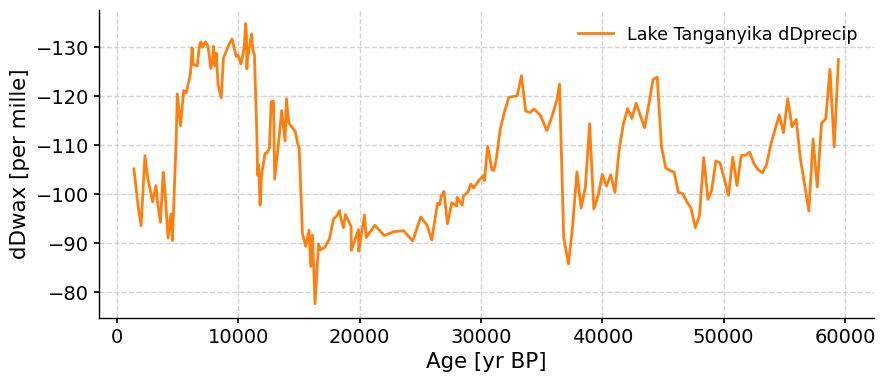

In [ ]:
ts_tang = pyleo.Series(
    time=tang_dD['Age'],
    value= tang_dD['dD_IVonly'],
    time_name='Age',
    time_unit='yr BP',
    value_name='dDwax',
    value_unit='per mille',
    label='Lake Tanganyika dDprecip'
)

ts_tang.plot(color='C1',invert_yaxis=True)

You may notice that the inverted the y-axis. When we're plotting dD data, we typically invert the y-axis because more negative ("depleted") values suggest increased rainfall, whereas more positive ("enriched") values suggest decreased rainfall.

## Uniform Time-Sampling of the Data
There a number of different reasons we might want to assign new values to our data. For example, if the data is not evenly spaced, we might need to resample it so that it is evenly spaced in order to use some other data analysis technique or to more easily compare to other data. 

First, let's check whether our data is already evenly spaced using the .is_evenly_spaced() method:

In [ ]:
ts_tang.is_evenly_spaced()

False

Our data is not evenly spaced. There are a few different methods available in `pyleoclim` to place the on a uniform axis: interpolating, binning, and coarse graining via a Gaussian kernel as in Rehfeld et al. (2011). In general all of these methods use the available data near a chosen time to estimate what the value was at that time, but each method differs in which nearby data points it uses and how it uses them.


###Interpolation
To start out, let's try using interpolation to evenly space our data. Interpolation projects the data onto an evenly spaced time axis with a distance between points (step size) of our choosing. There are a variety of different methods by which the data can be interpolated, these being: `linear`, `nearest`, `zero`, `slinear`, `quadratic`, `cubic`, `previous`, and `next`. More on these and their associated key word arguments can be found in the [documentation](https://pyleoclim-util.readthedocs.io/en/latest/core/api.html#pyleoclim.core.series.Series.interp). By default, the function `.interp()` implements linear interpolation:

In [ ]:
tang_linear = ts_tang.interp() #default method = 'linear'

In [ ]:
#Checking whether or not the series is now evenly spaced
tang_linear.is_evenly_spaced()

True

Now that we've interpolated our data, let's compare the original dataset to the linearly interpolated dataset we just created.

<Axes: xlabel='Age [yr BP]', ylabel='dDwax [per mille]'>

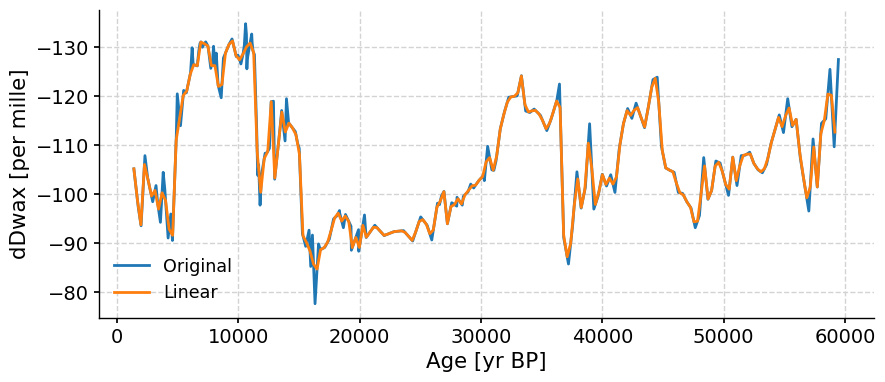

In [ ]:
fig, ax = ts_tang.plot(label='Original')
tang_linear.plot(ax=ax, label='Linear', invert_yaxis=True)

Notice that although there are some minor differences between the original and linearly interpolated data, the records are essential the same.

Let's compare a few of the different interpolation methods (e.g., quadratic, next, zero) with one another just to see how they are similar and different:

In [ ]:
tang_quadratic = ts_tang.interp(method='quadratic')
tang_next = ts_tang.interp(method='next')
tang_zero = ts_tang.interp(method='zero')

<Axes: xlabel='Age [yr BP]', ylabel='dDwax [per mille]'>

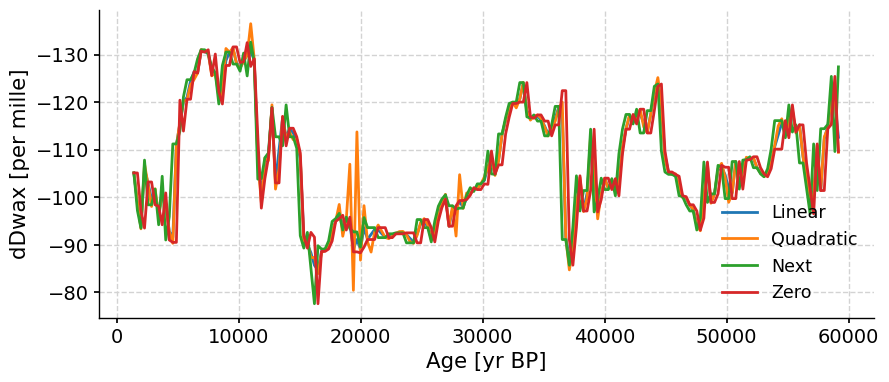

In [ ]:
fig, ax = tang_linear.plot(label='Linear',invert_yaxis=True)
tang_quadratic.plot(ax=ax,label='Quadratic')
tang_next.plot(ax=ax,label='Next')
tang_zero.plot(ax=ax,label='Zero')

You can see how the methods can produce slightly different results, but reproduce the same overall trend.

###Binning
Another option for resampling our data onto a uniform time axis is binning. Binning is when a set of time intervals is defined and data is grouped or binned with other data in the same interval, then all those points in a "bin" are averaged to get a data value for that bin. The defaults for binning pick a bin size at the coarsest time spacing present in the dataset and average data over a uniform sequence of such intervals. 

In [ ]:
tang_bin = ts_tang.bin()

<Axes: xlabel='Age [yr BP]', ylabel='dDwax [per mille]'>

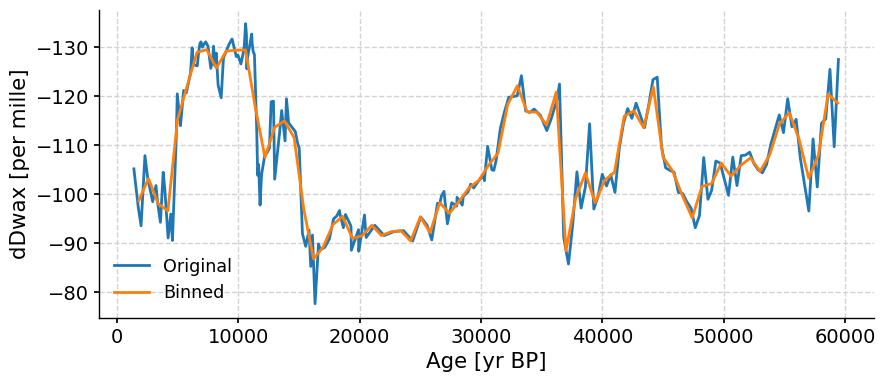

In [ ]:
fig, ax = ts_tang.plot(label='Original',invert_yaxis=True)
tang_bin.plot(ax=ax,label='Binned')

Again, notice that although there are some minor differences between the original and binned data, the records still capture the same overall trend.

##Principal Component Analysis (PCA)
Principal Component Analysis (PCA) is a tool that allows us to identify a common signal between various paleoclimate reconstructions. Doing so involves resampling all of the records onto a common time-step, so we will practice applying the skills we've learned so far in this tutorial.



So far, we've been looking at dD data from Lake Tanganyika in tropical East Africa. Let's compare this dD record to other existing dD records from lake and marine sediment cores in tropical Africa from the Gulf of Aden [(Tierney and deMenocal, 2017)](https://doi:10.1126/science.1240411), Lake Bosumtwi [(Shanahan et al., 2015)](https://doi:10.1038/ngeo2329), and the West African Margin [(Tierney et al., 2017)](https://doi:10.1126/sciadv.1601503).

First, let's load these datasets:

In [ ]:
# Gulf of Aden
aden_dD = pd.read_csv(data_dir+'aden_dD.csv')
aden_dD.head()

,depth_cm,age_calBP95-,age_calBP,age_calBP95+,dDwax,dDwaxIVcorr
0,1.25,-21,0,23,-128.9,-128.9
1,7.50,105,138,170,-128.3,-128.3
2,11.50,183,226,265,-133.6,-133.6
3,16.50,279,335,383,-133.6,-133.6
4,21.50,376,442,500,-138.1,-138.1


In [ ]:
#Lake Bosumtwi
bosumtwi_dD = pd.read_csv(data_dir+'bosumtwi_dD.csv')
bosumtwi_dD.head()

,age_calBP,d13CleafwaxC31,d2HleafwaxC31ivc
0,68.8162,-28.40,-19.463969
1,217.1656,-30.12,-19.605047
2,360.0397,-31.00,-12.654186
3,404.7102,-28.90,-15.056285
4,488.1144,-29.94,-13.752030


In [ ]:
# GC27 (West African Margin)
gc27_dD = pd.read_csv(data_dir+'gc27_dD.csv')
gc27_dD.head()

,depth_cm,age_BP,dDwax,dDwax_iv,d13Cwax,dDP
0,2.5,867,-130.2,-130.2,-30.64,-16.6
1,5.5,1345,-135.3,-135.2,-31.13,-22.8
2,9.5,2133,-131.7,-131.6,-30.85,-18.6
3,11.5,2535,-131.9,-131.9,-30.33,-18.1
4,14.5,3141,-132.1,-132.3,-30.07,-18.3


Next, let's convert each dataset into a `Series` in Pyleoclim.

In [ ]:
ts_tanganyika = pyleo.Series(
    time=tang_dD['Age'],
    value= tang_dD['dD_IVonly'],
    time_name='Age',
    time_unit='yr BP',
    value_name='dDwax',
    label='Lake Tanganyika'
)
ts_aden = pyleo.Series(
    time=aden_dD['age_calBP'],
    value= aden_dD['dDwaxIVcorr'],
    time_name='Age',
    time_unit='yr BP',
    value_name='dDwax',
    label='Gulf of Aden'
)
ts_bosumtwi = pyleo.Series(
    time=bosumtwi_dD['age_calBP'],
    value=bosumtwi_dD['d2HleafwaxC31ivc'],
    time_name='Age',
    time_unit='yr BP',
    value_name = 'dDwax',
    label='Lake Bosumtwi'
)
ts_gc27 = pyleo.Series(
    time=gc27_dD['age_BP'],
    value=gc27_dD['dDwax_iv'],
    time_name='Age',
    time_unit='yr BP',
    value_name='dDwax',
    label='GC27'
)

Now let's set up a `MultipleSeries` using Pyleoclim with all four dD datasets. 

In [ ]:
ts_list = [ts_tanganyika, ts_aden, ts_bosumtwi, ts_gc27]
ms_africa = pyleo.MultipleSeries(ts_list, name='African dDwax')

We can now create a stackplot with all four dD records:

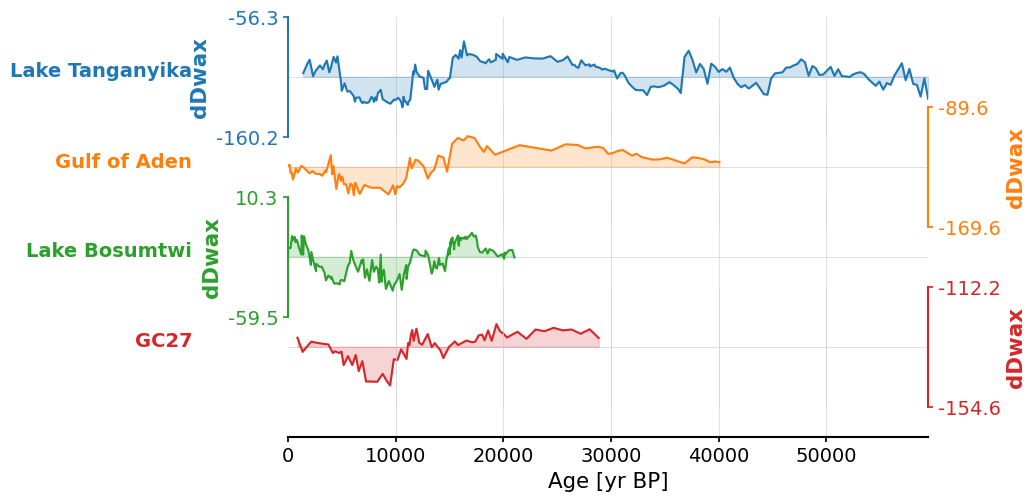

In [ ]:
fig, ax = ms_africa.stackplot()

By creating a stackplot, we can easily compare between the datasets. However, the four dD records aren't the same resolution and don't span the same time interval.

To better compare the records and assess a common trend, we can use PCA. First, we can use `.common_time()` to place the records on a shared time axis with a common sampling frequency. Let's set the time step 500 years and standarize the data:

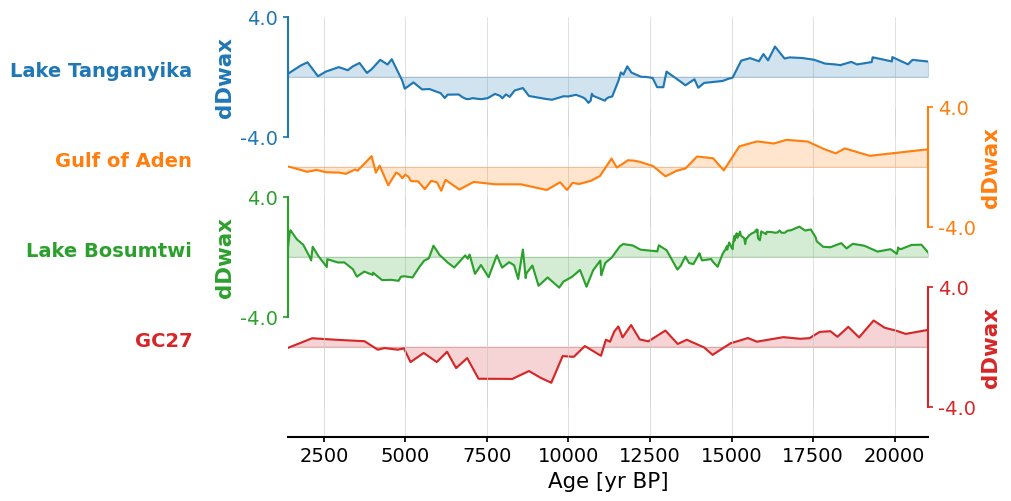

In [ ]:
africa_ct = ms_africa.common_time(step=0.5).standardize()
fig, ax = africa_ct.stackplot()

We now have standardized dD records that are the same sampling resolution and span the same time interval. Now let's apply PCA:

In [ ]:
PCA = africa_ct.pca()

The result is an object containing multiple outputs, and with two plotting methods attached to it. For example, we can print the percentage of variance accounted for by each mode, which is saved as pctvar:

In [ ]:
print(PCA.pctvar.round())

[97.  2.  1.  0.]


This means that 97% of the variance in the four paleoclimate records is explained by the first principal component. The number of datasets in the PCA constrains the number of principal components that can be defined, which is why we only have four components in this example.

Now let's create a new series for the first mode of variance and plot it against the original datasets:

In [ ]:
pc1 = PCA.pcs

In [ ]:
mode1 = pyleo.Series(
    time=africa_ct.series_list[0].time,
    value=PCA.pcs[:,0],
    label=r'$PC_1$',
    value_name='PC1',
    time_name ='age',
    time_unit = 'yr BP'
)

<Axes: xlabel='Age [yr BP]', ylabel='dDwax'>

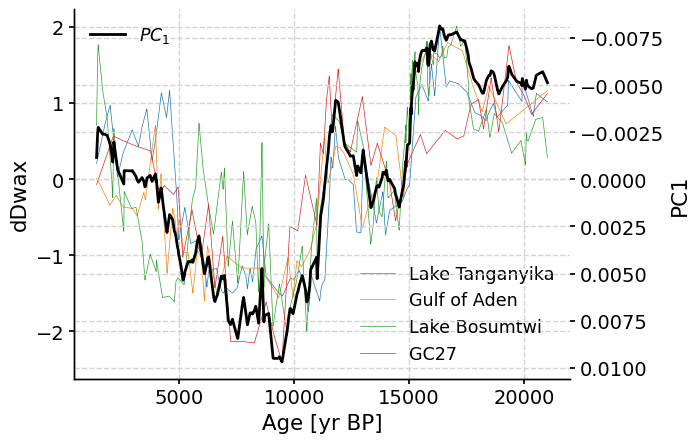

In [ ]:
fig, ax1 = plt.subplots()

ax1.set_ylabel('dDwax')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('PC1')  # we already handled the x-label with ax1

#plt.plot(mode1.time,pc1_scaled)
mode1.plot(color='black', ax=ax2, invert_yaxis=True)
africa_ct.plot(ax=ax1, linewidth=0.5)

The original dD records are shown in the colored lines, and the PC1 time series is shown in black. 
 

*   How do the original time series compare to the PC1 time series? Do they record similar trends?
*   Which original dD record most closely resembles the PC1 time series?
*   What changes in climate does the PC1 time series record over the past 20,000 years? *Hint: remember that more depleted dD suggests increased rainfall.*



 